In [56]:
import pandas as pd
df=pd.read_csv("/content/Program_1_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [2]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


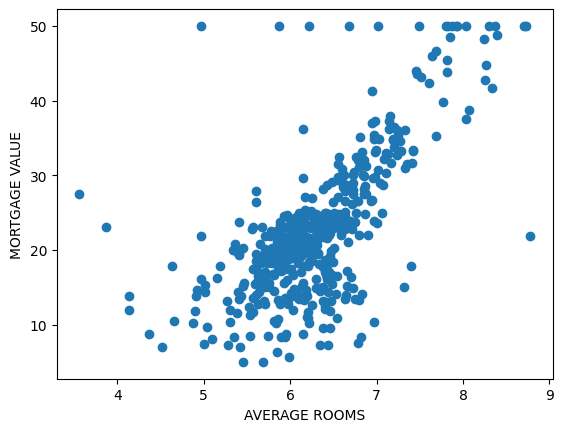

In [43]:
x=df['Avg_rooms ']
y=df['MValue']
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("AVERAGE ROOMS")
plt.ylabel("MORTGAGE VALUE")
plt.show()

We can see a linear trend between these two variables. As you can see it has a lot of outliers we need to either delete it if the number of outlier entry is low or we should cluster it togeather if its more.

In [15]:
df['Avg_rooms '].isnull().sum()


0

In [16]:
df['MValue'].isnull().sum()

0

No null values present.


<Axes: >

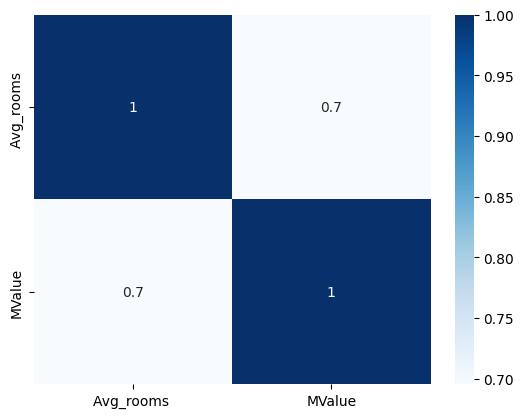

In [71]:
import seaborn as sns
features=['Avg_rooms ','MValue']
corre=df[features]
sns.heatmap(corre.corr(),annot=True,cmap="Blues")

In [60]:
from sklearn.model_selection import train_test_split
X=df["Avg_rooms "]
X = X.values.reshape(-1, 1)
Y=df["MValue"]
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [61]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [62]:
ypred=model.predict(xtest)

In [64]:
print("Coeffecient : ",model.coef_)
print("Intercept : ",model.intercept_)

Coeffecient :  [9.62984771]
Intercept :  -37.84404305978261


In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
ypred = model.predict(xtrain)
mse_train = mean_squared_error(ytrain, ypred)
r2_train = r2_score(ytrain, ypred)
ypred = model.predict(xtest)
mse_test = mean_squared_error(ytest, ypred)
r2_test = r2_score(ytest, ypred)
print("MSE for training data:", mse_train)
print("R2 score for training data:",r2_train)
print("\nMSE for testing data:", mse_test)
print("R2 score for testing data:",r2_test)

MSE for training data: 45.18283777567817
R2 score for training data: 0.5089369988287367

MSE for testing data: 40.44057372978344
R2 score for testing data: 0.3802694362598168


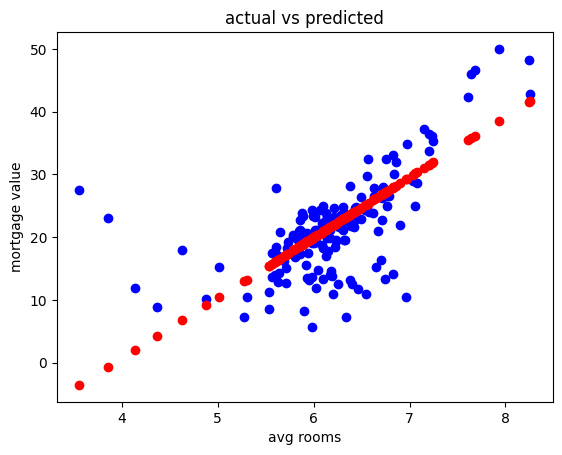

In [66]:
plt.scatter(xtest, ytest, color="blue")
plt.scatter(xtest, ypred, color="red")
plt.title("actual vs predicted")
plt.xlabel("avg rooms")
plt.ylabel("mortgage value")
plt.show()